# Linear regression and multiple linear regression

In linear regression we seek to predict the value of a continuous variable based on either a single variable, or a set of variables.

The example we will lok at below seeks to predict life span based on weight, height, physical activity, BMI, gender, and whether the person has a history of smoking.

With linear regression we assume that the output variable (lifespan in this example) is linearly related to the features we have (we will look at non-linear models in the next module).

This example uses a synthetic data set.

## Load data

In [136]:
import pandas as pd

filename = 'https://gitlab.com/michaelallen1966/1804_python_healthcare_wordpress/raw/master/jupyter_notebooks/life_expectancy.csv'
df = pd.read_csv(filename)
df.head()

,weight,smoker,physical_activity_scale,BMI,height,male,life_expectancy
0,51,1,6,22,152,1,57
1,83,1,5,34,156,1,36
2,78,1,10,18,208,0,78
3,106,1,3,28,194,0,49
4,92,1,7,23,200,0,67


## Exploratory data analysis

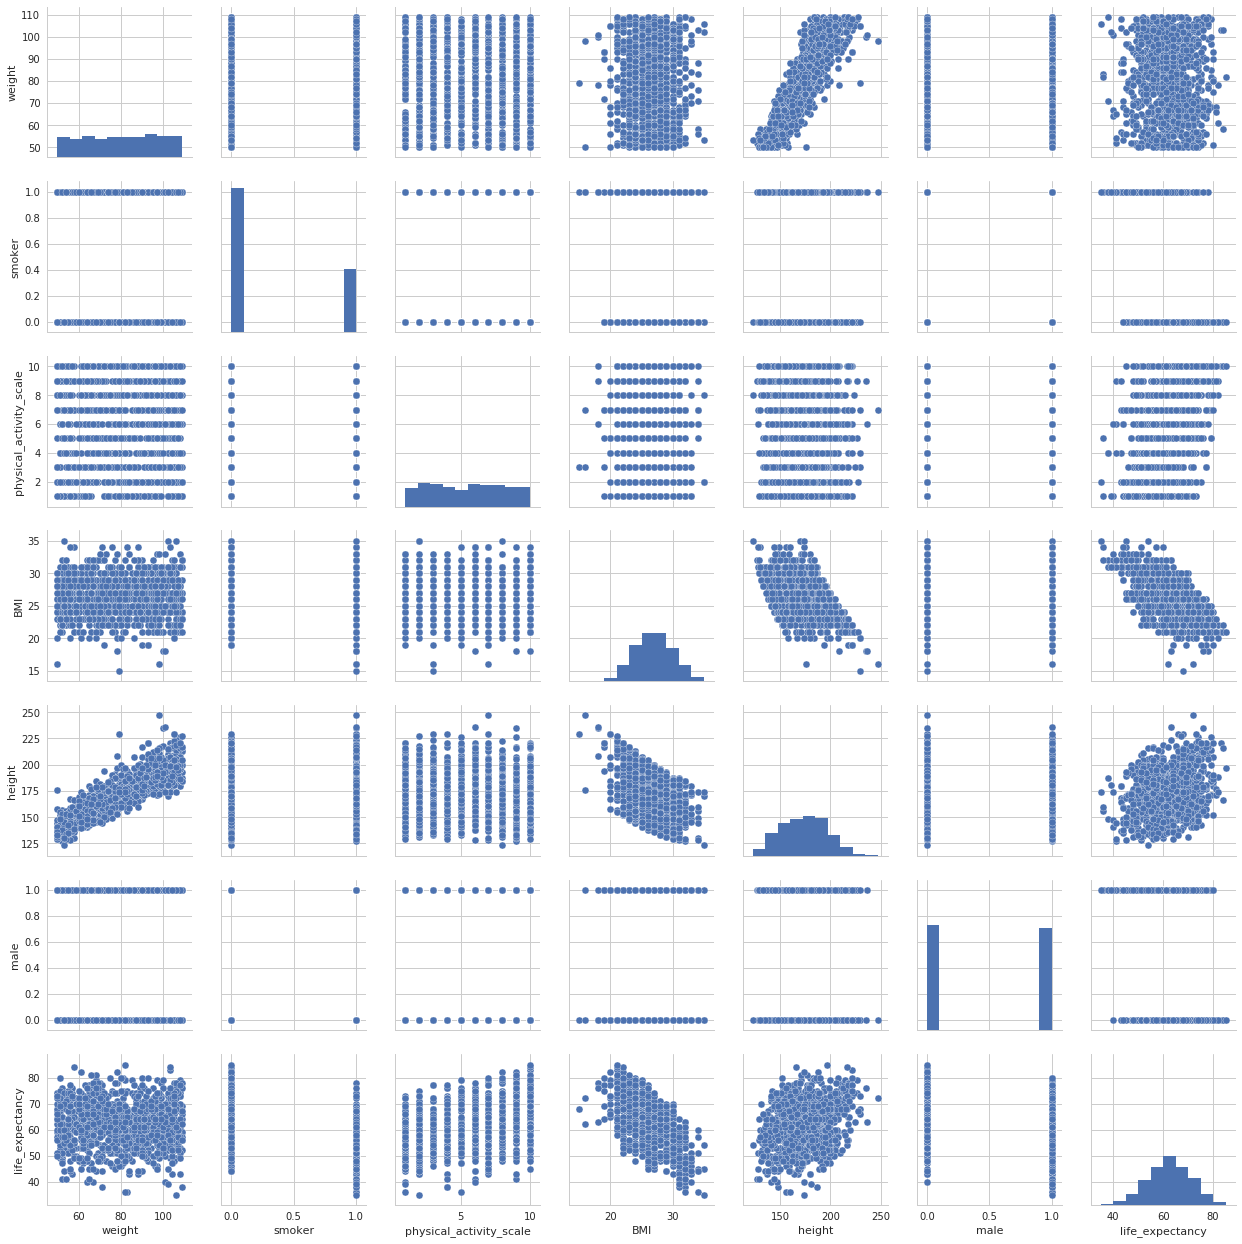

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(df, size = 2.5)
plt.show()

We can show the correlation matrix with np.corrcoef (np.cov would show the non-standardised covariance matrix; a correlation matrix has the same values as a covariance matrix on standardised data). Note that we need to transpose our data so that each feature is in a row rather than a column.

When building a linear regression model we are most iterested in those features which have the strongest correlation with our outcome. If there are high degress of covariance between features we may wish to consider using proncipal component analysis to reduce the data set.

Correlation matrix:

[[ 1.    -0.012 -0.03  -0.011  0.879 -0.004 -0.009]
 [-0.012  1.     0.034 -0.027  0.006  0.018 -0.518]
 [-0.03   0.034  1.    -0.028 -0.009 -0.007  0.366]
 [-0.011 -0.027 -0.028  1.    -0.477 -0.019 -0.619]
 [ 0.879  0.006 -0.009 -0.477  1.     0.006  0.278]
 [-0.004  0.018 -0.007 -0.019  0.006  1.    -0.299]
 [-0.009 -0.518  0.366 -0.619  0.278 -0.299  1.   ]]



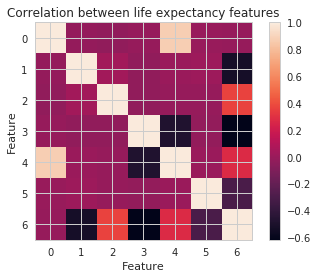

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

np.set_printoptions(precision=3)
corr_mat = np.corrcoef(df.values.T)
print ('Correlation matrix:\n')
print (corr_mat)
print ()

# Plot correlation matrix
plt.imshow(corr_mat, interpolation='nearest')
plt.colorbar()
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation between life expectancy features')
plt.show()

## Fitting a linear regression model using a single feature

To illustrate linear regression, we'll start with a single feature. We'll pick BMI.

In [139]:
X = df['BMI'].values.reshape(-1, 1) 
X = X.astype('float')
y = df['life_expectancy'].values.reshape(-1, 1)
y = y.astype('float')

# Standardise X and y
# Though this may often not be necessary it may help when features are on
# very different scales. We won't use the standardised data here,
# but here is how it would be done
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_std = sc_X.fit_transform(X)
Y_std = sc_y.fit_transform(X)

# Create linear regression model
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)

# Print model coefficients
print ('Slope =', slr.coef_[0])
print ('Intercept =', slr.intercept_)


Slope = [-1.739]
Intercept = [ 107.874]


## Predicting values

We can simply use the predict method of the linear regression model to predict values for any given X. (We use 'flatten' below to change from a column array toa row array).

In [140]:
y_pred = slr.predict(X)

print ('Actual = ', y[0:5].flatten())
print ('Predicted = ', y_pred[0:5].flatten())


Actual =  [ 57.  36.  78.  49.  67.]
Predicted =  [ 69.616  48.748  76.572  59.182  67.877]


## Obtaining metrics of observed vs predicted

The metrics module from sklearn contains simple methos of reporting metrics given observed and predicted values.

In [141]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R-square:',metrics.r2_score(y, y_pred))

Mean Absolute Error: 5.5394378529
Mean Squared Error: 45.9654230242
Root Mean Squared Error: 6.77978045545
R-square: 0.382648884752


## Plotting observed values and fitted line

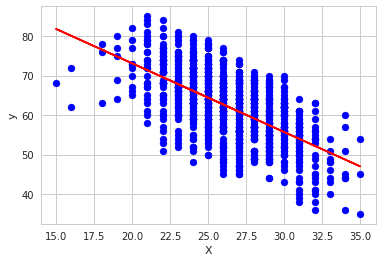

In [142]:
plt.scatter (X, y, c = 'blue')
plt.plot (X, slr.predict(X), color = 'red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Plotting observed vs. predicted values

Plotting observed vs. predicted can give a good sense of the accuracy of the model, and is also suitable when there are multiple X features.

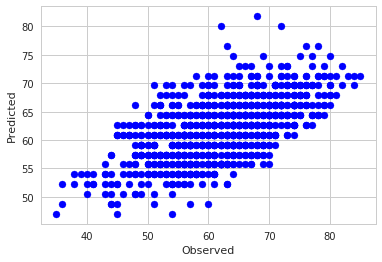

In [143]:
plt.scatter (y, slr.predict(X), c = 'blue')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

## Fitting a model to multiple X features

The method desribed above works with any number of X features. Generally we may wish to pick those features with the highest correlation to the outcome value, but here we will use them all.

In [144]:
X = df.values[:, :-1]
y = df.values[:, -1]

In [145]:
# Create linear regression model
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)

# Print model coefficients
print ('Slope =', slr.coef_)
print ('Intercept =', slr.intercept_)

Slope = [  0.145 -10.12    1.104  -2.225  -0.135  -5.148]
Intercept = 132.191010159


Show metrics (notice the improvement)

In [146]:
y_pred = slr.predict(X)
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R-square:',metrics.r2_score(y, y_pred))


Mean Absolute Error: 2.4055613151
Mean Squared Error: 7.96456424623
Root Mean Squared Error: 2.82215595711
R-square: 0.89302975375


Plot observed vs. predicted:

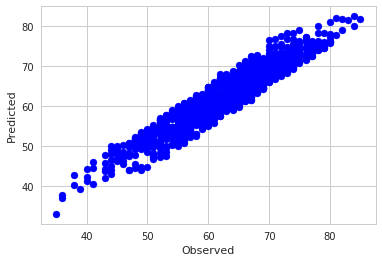

In [147]:
plt.scatter (y, slr.predict(X), c = 'blue')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

## Plotting residuals

Residuals are simply the difference between an obsered value and its predicted value. We can plt the relationship between observed values and residuals. Ideally we like to see that there is no clear relationship between predicted value and residual - residuals should be randomly distributed. Residual plotting may also be used to look to see if there are any outliers which might be having an effect on our model (in which case we may decdie that it better to remove the outliers and re-fit).

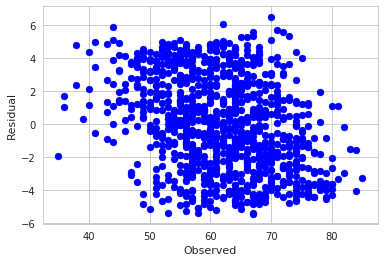

In [148]:
residuals = slr.predict(X) - y # predicted - observed
plt.scatter (y, residuals, c = 'blue')
plt.xlabel('Observed')
plt.ylabel('Residual')
plt.show()